In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [13]:
dataset_path = r"C:\Users\User\OneDrive\Desktop\Tumor CLF CNN"
train_dir = f"{dataset_path}\\Training"
test_dir = f"{dataset_path}\\Testing"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [15]:
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))
train_df = pd.concat(train_data, ignore_index=True)

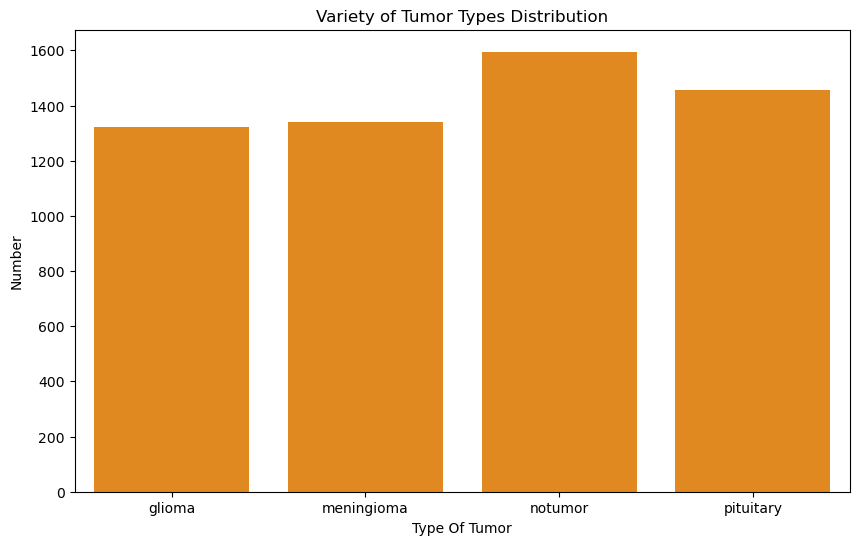

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(data=train_df, x="Category", y="Count", color = "darkorange")
plt.title("Variety of Tumor Types Distribution")
plt.xlabel("Type Of Tumor")
plt.ylabel("Number")
plt.show()

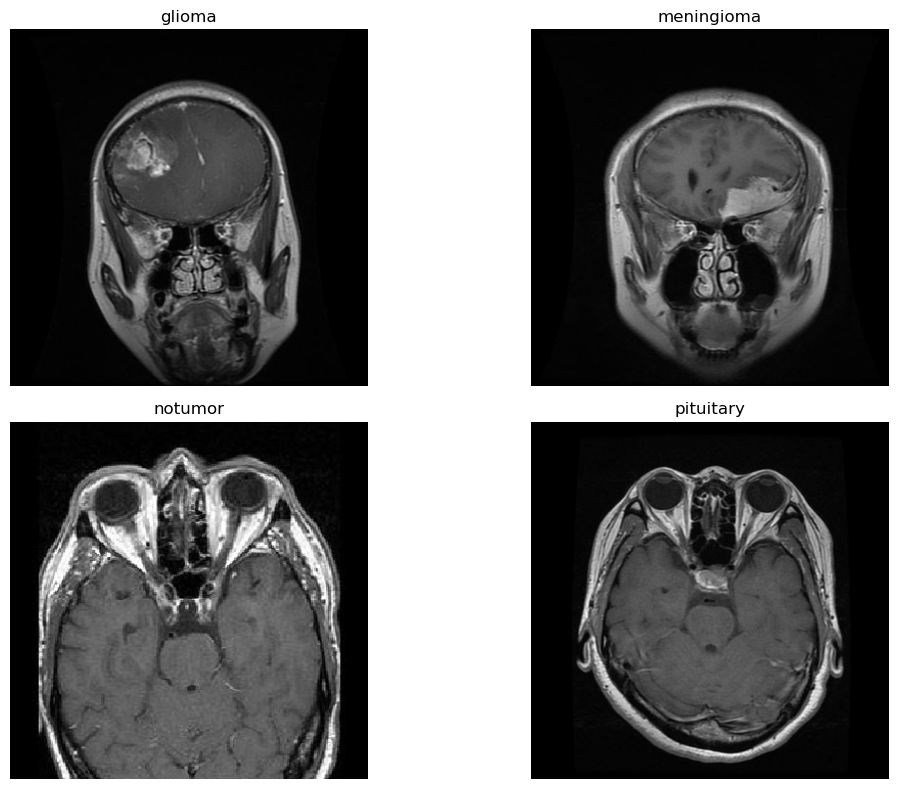

In [19]:
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [21]:
image_size = (150, 150)
batch_size = 32
epochs = 30

In [23]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)
train_generator = train_generator

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [29]:
model = Sequential([
    Input(shape=(image_size[0], image_size[1], 3)),  
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.4737 - loss: 1.1420 - val_accuracy: 0.4547 - val_loss: 1.8495
Epoch 2/30
  1/178 ━━━━━━━━━━━━━━━━━━━━ 1:27 492ms/step - accuracy: 0.7500 - loss: 0.7476

C:\Users\User\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.7476 - val_accuracy: 0.5161 - val_loss: 1.0859
Epoch 3/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 116s 653ms/step - accuracy: 0.7049 - loss: 0.7472 - val_accuracy: 0.7078 - val_loss: 0.7075
Epoch 4/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 818us/step - accuracy: 0.6562 - loss: 0.7526 - val_accuracy: 0.7742 - val_loss: 0.7722
Epoch 5/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 106s 597ms/step - accuracy: 0.7501 - loss: 0.6353 - val_accuracy: 0.5266 - val_loss: 1.2741
Epoch 6/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 845us/step - accuracy: 0.7500 - loss: 0.7397 - val_accuracy: 0.5161 - val_loss: 1.0964
Epoch 7/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 107s 599ms/step - accuracy: 0.7716 - loss: 0.5814 - val_accuracy: 0.6422 - val_loss: 0.8873
Epoch 8/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - accuracy: 0.6875 - loss: 0.6011 - val_accuracy: 0.8387 - val_loss: 0.4007
Epoch 9/30
178/178 ━━━━━━━━━━━━━━━━━━━━ 105s 591ms/step - accuracy: 0.8060 - loss: 0.4925 - val_a

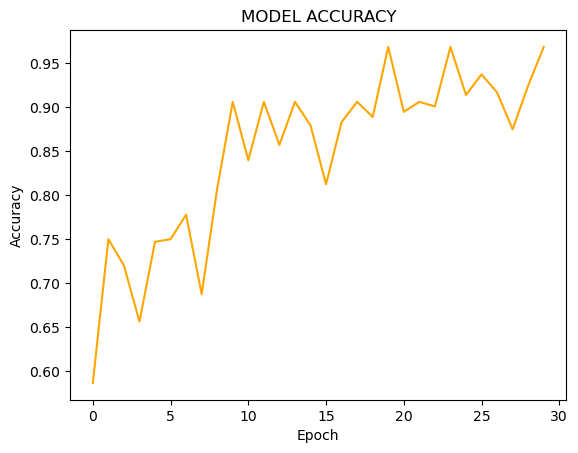

Accuracy = 0.97


In [53]:
plt.plot(history.history['accuracy'], color='orange')
plt.title('MODEL ACCURACY')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
max_accuracy = max(accuracy)
print(f"Accuracy = {max_accuracy:.2f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step


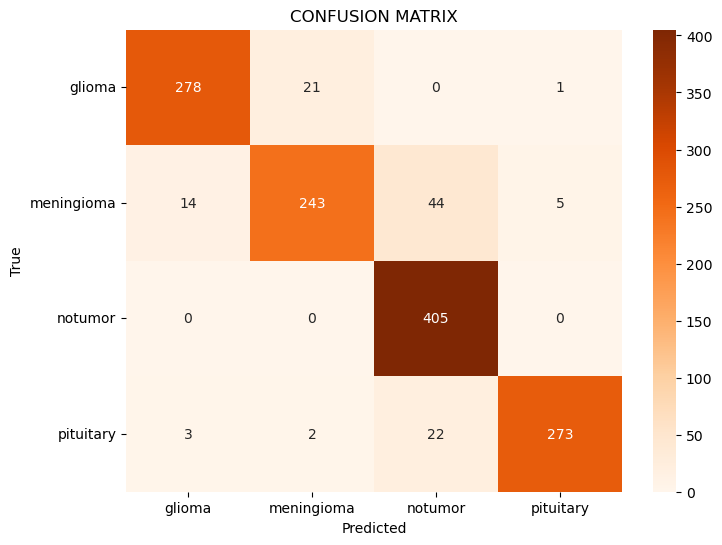

In [59]:
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Oranges")
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)) + 0.5, labels=categories, ha='center', rotation=0)
plt.yticks(ticks=np.arange(len(categories)) + 0.5, labels=categories, va='center', rotation=0)
plt.show()

Class: glioma
Precision: 0.9423728813559322
Recall: 0.9266666666666666
F1-Score: 0.9344537815126052

Class: meningioma
Precision: 0.9135338345864662
Recall: 0.7941176470588235
F1-Score: 0.8496503496503496

Class: notumor
Precision: 0.8598726114649682
Recall: 1.0
F1-Score: 0.9246575342465754

Class: pituitary
Precision: 0.978494623655914
Recall: 0.91
F1-Score: 0.9430051813471503



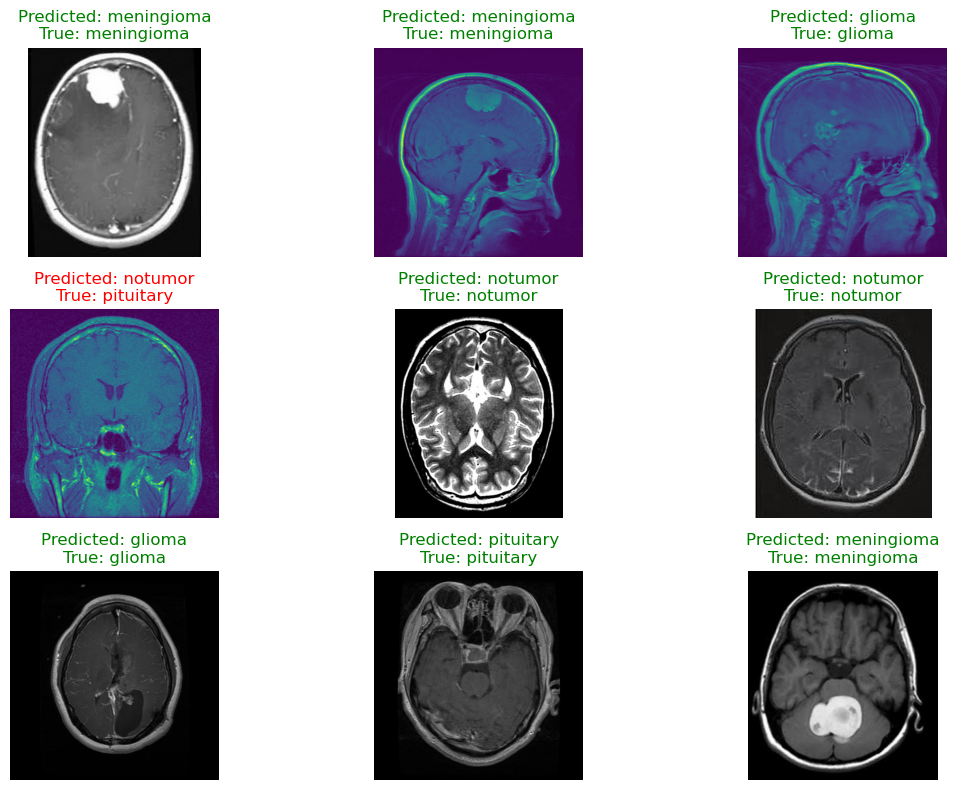

In [63]:
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()

In [65]:
model.save("brain_tumor_detection_model.keras")